# Neural Modelling Assignment 3
Submission Group: Luca Kosina (6084778), Sascha Mühlinghaus (7075485)

### Part 1: TD Learning

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

In [13]:
def update_weights(alpha, stimuli, rewards, n_trials):
    V = np.zeros((len(stimuli))) # initialize value array for time points
    W = np.zeros(len(stimuli)) # initialize weight for each time point
    delta = np.zeros([len(n_trials), len(stimuli)]) # initialize 2D array for trial x time
    delta_v = np.zeros((len(stimuli))) # initialize array for delta v

    def value_helper(W, stimuli, t):
            # compute value for a given time point
            return (W[0:t] @ stimuli[t:0:-1])[0]
    
    for n in tqdm(range(len(n_trials))):
        # for every trial do the following
        for t in range(1, len(stimuli)):
            # compute delta_v for every time point
            V[t] = value_helper(W, stimuli, t)
            delta_v[t-1] = V[t] - V[t-1]
            # compute delta for every time step
            delta[n, t] = rewards[t] + delta_v[t]
            for tau in np.arange(t):
                # compute weight update 
                weight_update = W[tau] + alpha * delta[n, t] * stimuli[t-tau]
                # update every weight in the past
                W[tau] = weight_update

    return W, V, delta_v, delta

In [17]:
t = 250 # number of time points
timesteps = np.arange(t) # time array
v_before = np.zeros(t) # value array
delta_v_before = np.zeros(t) # prediction error array

alpha = 0.1 # learning rate
u_stim = np.zeros((t, 1)) # stimuli array
u_stim[100] = 1 # stimulus at time point 50
# initialize the reward array
rewards = np.zeros(250)
# define the parameters for the Gaussian distribution
mean = 200
std = 1  
x = np.arange(250)
gaussian = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std) ** 2)
# Normalize the Gaussian to have an integral of 2
gaussian *= 2 / np.sum(gaussian)
# Assign the Gaussian distribution to the reward array
rewards = gaussian
delta_weight_before = gaussian
n_trials = np.arange(2000)  # number of trials

In [19]:
# call the temporal difference learning function
W_after, V_after, delta_v_after, delta_weight_after = update_weights(alpha, u_stim, rewards, n_trials)

100%|██████████| 2000/2000 [03:26<00:00,  9.67it/s]


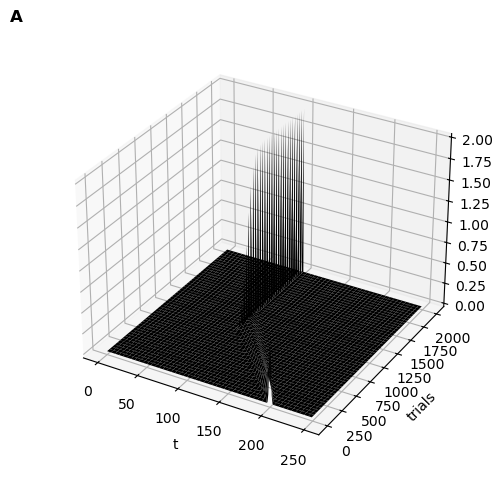

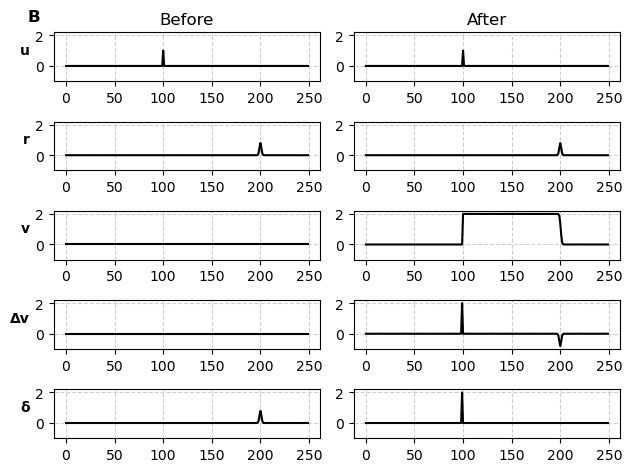

In [22]:
x, y = np.meshgrid(np.arange(delta_weight_after.shape[1]), np.arange(delta_weight_after.shape[0])) # Create a mesh grid for X and Y

data_before = [u_stim, rewards, v_before, delta_v_before, delta_weight_before]
data_after = [u_stim, rewards, V_after, delta_v_after, delta_weight_after[-1, :]]

def reproduce_plot(data_before, data_after, x, y):
    labels = ['u', 'r', 'v', 'Δv', 'δ']

    # --- Panel A: 3D Surface Plot ---
    fig_a = plt.figure()
    ax1 = fig_a.add_subplot(111, projection='3d')
    ax1.plot_surface(x, y, delta_weight_after, antialiased=True,  color='k', alpha=1)
    ax1.set_xlabel('t')
    ax1.set_ylabel('trials')

    # Reposition the z-label
    ax1.set_zlabel("delta", labelpad=10)
    ax1.zaxis.label.set_position((0.05, 0.5))
    ax1.text2D(-0.1, 1.05, "A", transform=ax1.transAxes, fontsize=12, fontweight='bold')          

    # Show the figure for Panel B
    plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.1)
    plt.tight_layout()
    plt.show()

    # --- Panel B: Line Plots ---
    fig_b = plt.figure()  
    for i, (data_b, data_a, label) in enumerate(zip(data_before, data_after, labels)):
        # Before subplot: left column
        ax2 = fig_b.add_subplot(5, 2, 2 * i + 1)  # Corrected for left column
        ax2.plot(timesteps, data_b, color='black')
        ax2.set_ylabel(label, fontweight='bold')
        ax2.yaxis.label.set(rotation='horizontal', ha='right')
        ax2.set_ylim(-1, 2.2)
        ax2.grid(True, linestyle='--', alpha=0.6)
        if i == 0:
            ax2.set_title('before')
        
        # After subplot: right column
        ax3 = fig_b.add_subplot(5, 2, 2 * i + 2)  # Corrected for right column
        ax3.plot(timesteps, data_a, color='black')
        ax3.set_ylim(-1, 2.2)
        ax3.grid(True, linestyle='--', alpha=0.6)
        if i == 0:
            ax3.set_title('after')

    # Add panel label "B"
    fig_b.text(0.05, 0.95, "B", fontsize=12, fontweight='bold')

    # Adjust layout for Panel B to prevent overlap
    plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.05, hspace=0.5, wspace=0.3)

    # Show the figure for Panel B
    plt.tight_layout()
    plt.show()
    

reproduce_plot(data_before, data_after, x, y)